In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from bellek.dvc.experiment import load_experiments

experiments = load_experiments('qa-prompt-optim-experiments3.json')
print(f"{len(experiments)} experiments")
experiments[0]

13 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'train': {'dataset': {'path': 'bdsaglam/musique-mini',
    'name': 'answerable',
    'split': 'train'},
   'optimizer': 'bfs-medium'},
  'qa': {'model': 'llama-3-70b-tgi',
   'temperature': 0.1,
   'technique': 'standard'},
  'evaluation': {'dataset': {'path': 'bdsaglam/musique-mini',
    'name': 'answerable',
    'split': 'validation'}},
  'run': 1},
 'metrics': {'exact_match': 0.6133333333333333,
  'f1': 0.7138668274736386,
  'fuzzy_match': 0.6866666666666666}}

In [3]:
df = pd.json_normalize(experiments).drop(columns=["commit", "id"])

param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop_duplicates(subset=param_cols, inplace=True)

df = df[~df['name'].isin([None])].copy()
df = df[df['params.evaluation.dataset.path']=='bdsaglam/musique-mini'].copy()
df.reset_index(drop=True, inplace=True)
df

,name,params.train.dataset.path,params.train.dataset.name,params.train.dataset.split,params.train.optimizer,params.qa.model,params.qa.temperature,params.qa.technique,params.evaluation.dataset.path,params.evaluation.dataset.name,params.evaluation.dataset.split,params.run,metrics.exact_match,metrics.f1,metrics.fuzzy_match
0,fried-weep,bdsaglam/musique-mini,answerable,train,miprov2-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique-mini,answerable,validation,1,0.600000,0.689632,0.653333
1,hyoid-pope,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique-mini,answerable,validation,1,0.600000,0.689632,0.653333
2,couth-heck,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,cot,bdsaglam/musique-mini,answerable,validation,1,0.620000,0.723241,0.686667
3,ocher-umbo,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,standard,bdsaglam/musique-mini,answerable,validation,1,0.633333,0.728797,0.696667
4,sewed-here,bdsaglam/musique-mini,answerable,train,miprov2-medium,llama-3-70b-tgi,0.1,cot,bdsaglam/musique-mini,answerable,validation,1,0.603333,0.710480,0.676667
5,lippy-pein,bdsaglam/musique-mini,answerable,train,miprov2-medium,llama-3-70b-tgi,0.1,standard,bdsaglam/musique-mini,answerable,validation,1,0.600000,0.702481,0.666667
6,elite-mime,bdsaglam/musique-mini,answerable,train,bfs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique-mini,answerable,validation,1,0.616667,0.716104,0.676667
7,finer-sike,bdsaglam/musique-mini,answerable,train,noop,llama-3-70b-tgi,0.1,cte,bdsaglam/musique-mini,answerable,validation,1,0.600000,0.689632,0.653333
8,farci-drop,bdsaglam/musique-mini,answerable,train,noop,llama-3-70b-tgi,0.1,cot,bdsaglam/musique-mini,answerable,validation,1,0.613333,0.703808,0.653333
9,runty-hymn,bdsaglam/musique-mini,answerable,train,bfs-medium,llama-3-70b-tgi,0.1,cot,bdsaglam/musique-mini,answerable,validation,1,0.620000,0.730378,0.683333


In [4]:
target_params = ["params.qa.technique", "params.train.optimizer", "params.qa.temperature"]

In [5]:
run_counts = df.groupby(target_params)[metric_cols[:1]].count().reset_index()
mask = run_counts[metric_cols[0]] < 3
run_counts.loc[mask]

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match
0,cot,bfs-medium,0.1,1
1,cot,bfsrs-medium,0.1,1
2,cot,miprov2-medium,0.1,1
3,cot,noop,0.1,1
4,cte,bfs-medium,0.1,1
5,cte,bfsrs-medium,0.1,1
6,cte,miprov2-medium,0.1,1
7,cte,noop,0.1,1
8,standard,bfsrs-medium,0.1,1
9,standard,miprov2-medium,0.1,1


In [6]:
# Average metrics over repeated runs (params.run)
df_avg = df.groupby(target_params)[metric_cols].mean().reset_index()
df_avg[[*target_params, *metric_cols]].sort_values("metrics.f1")

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match
10,standard,noop,0.1,0.550000,0.664317,0.606667
5,cte,bfsrs-medium,0.1,0.600000,0.689632,0.653333
6,cte,miprov2-medium,0.1,0.600000,0.689632,0.653333
7,cte,noop,0.1,0.600000,0.689632,0.653333
9,standard,miprov2-medium,0.1,0.600000,0.702481,0.666667
3,cot,noop,0.1,0.613333,0.703808,0.653333
2,cot,miprov2-medium,0.1,0.603333,0.710480,0.676667
4,cte,bfs-medium,0.1,0.616667,0.716104,0.676667
1,cot,bfsrs-medium,0.1,0.620000,0.723241,0.686667
8,standard,bfsrs-medium,0.1,0.633333,0.728797,0.696667


In [7]:
df_target = df_avg.copy()
df_target.sort_values('metrics.f1', inplace=True)

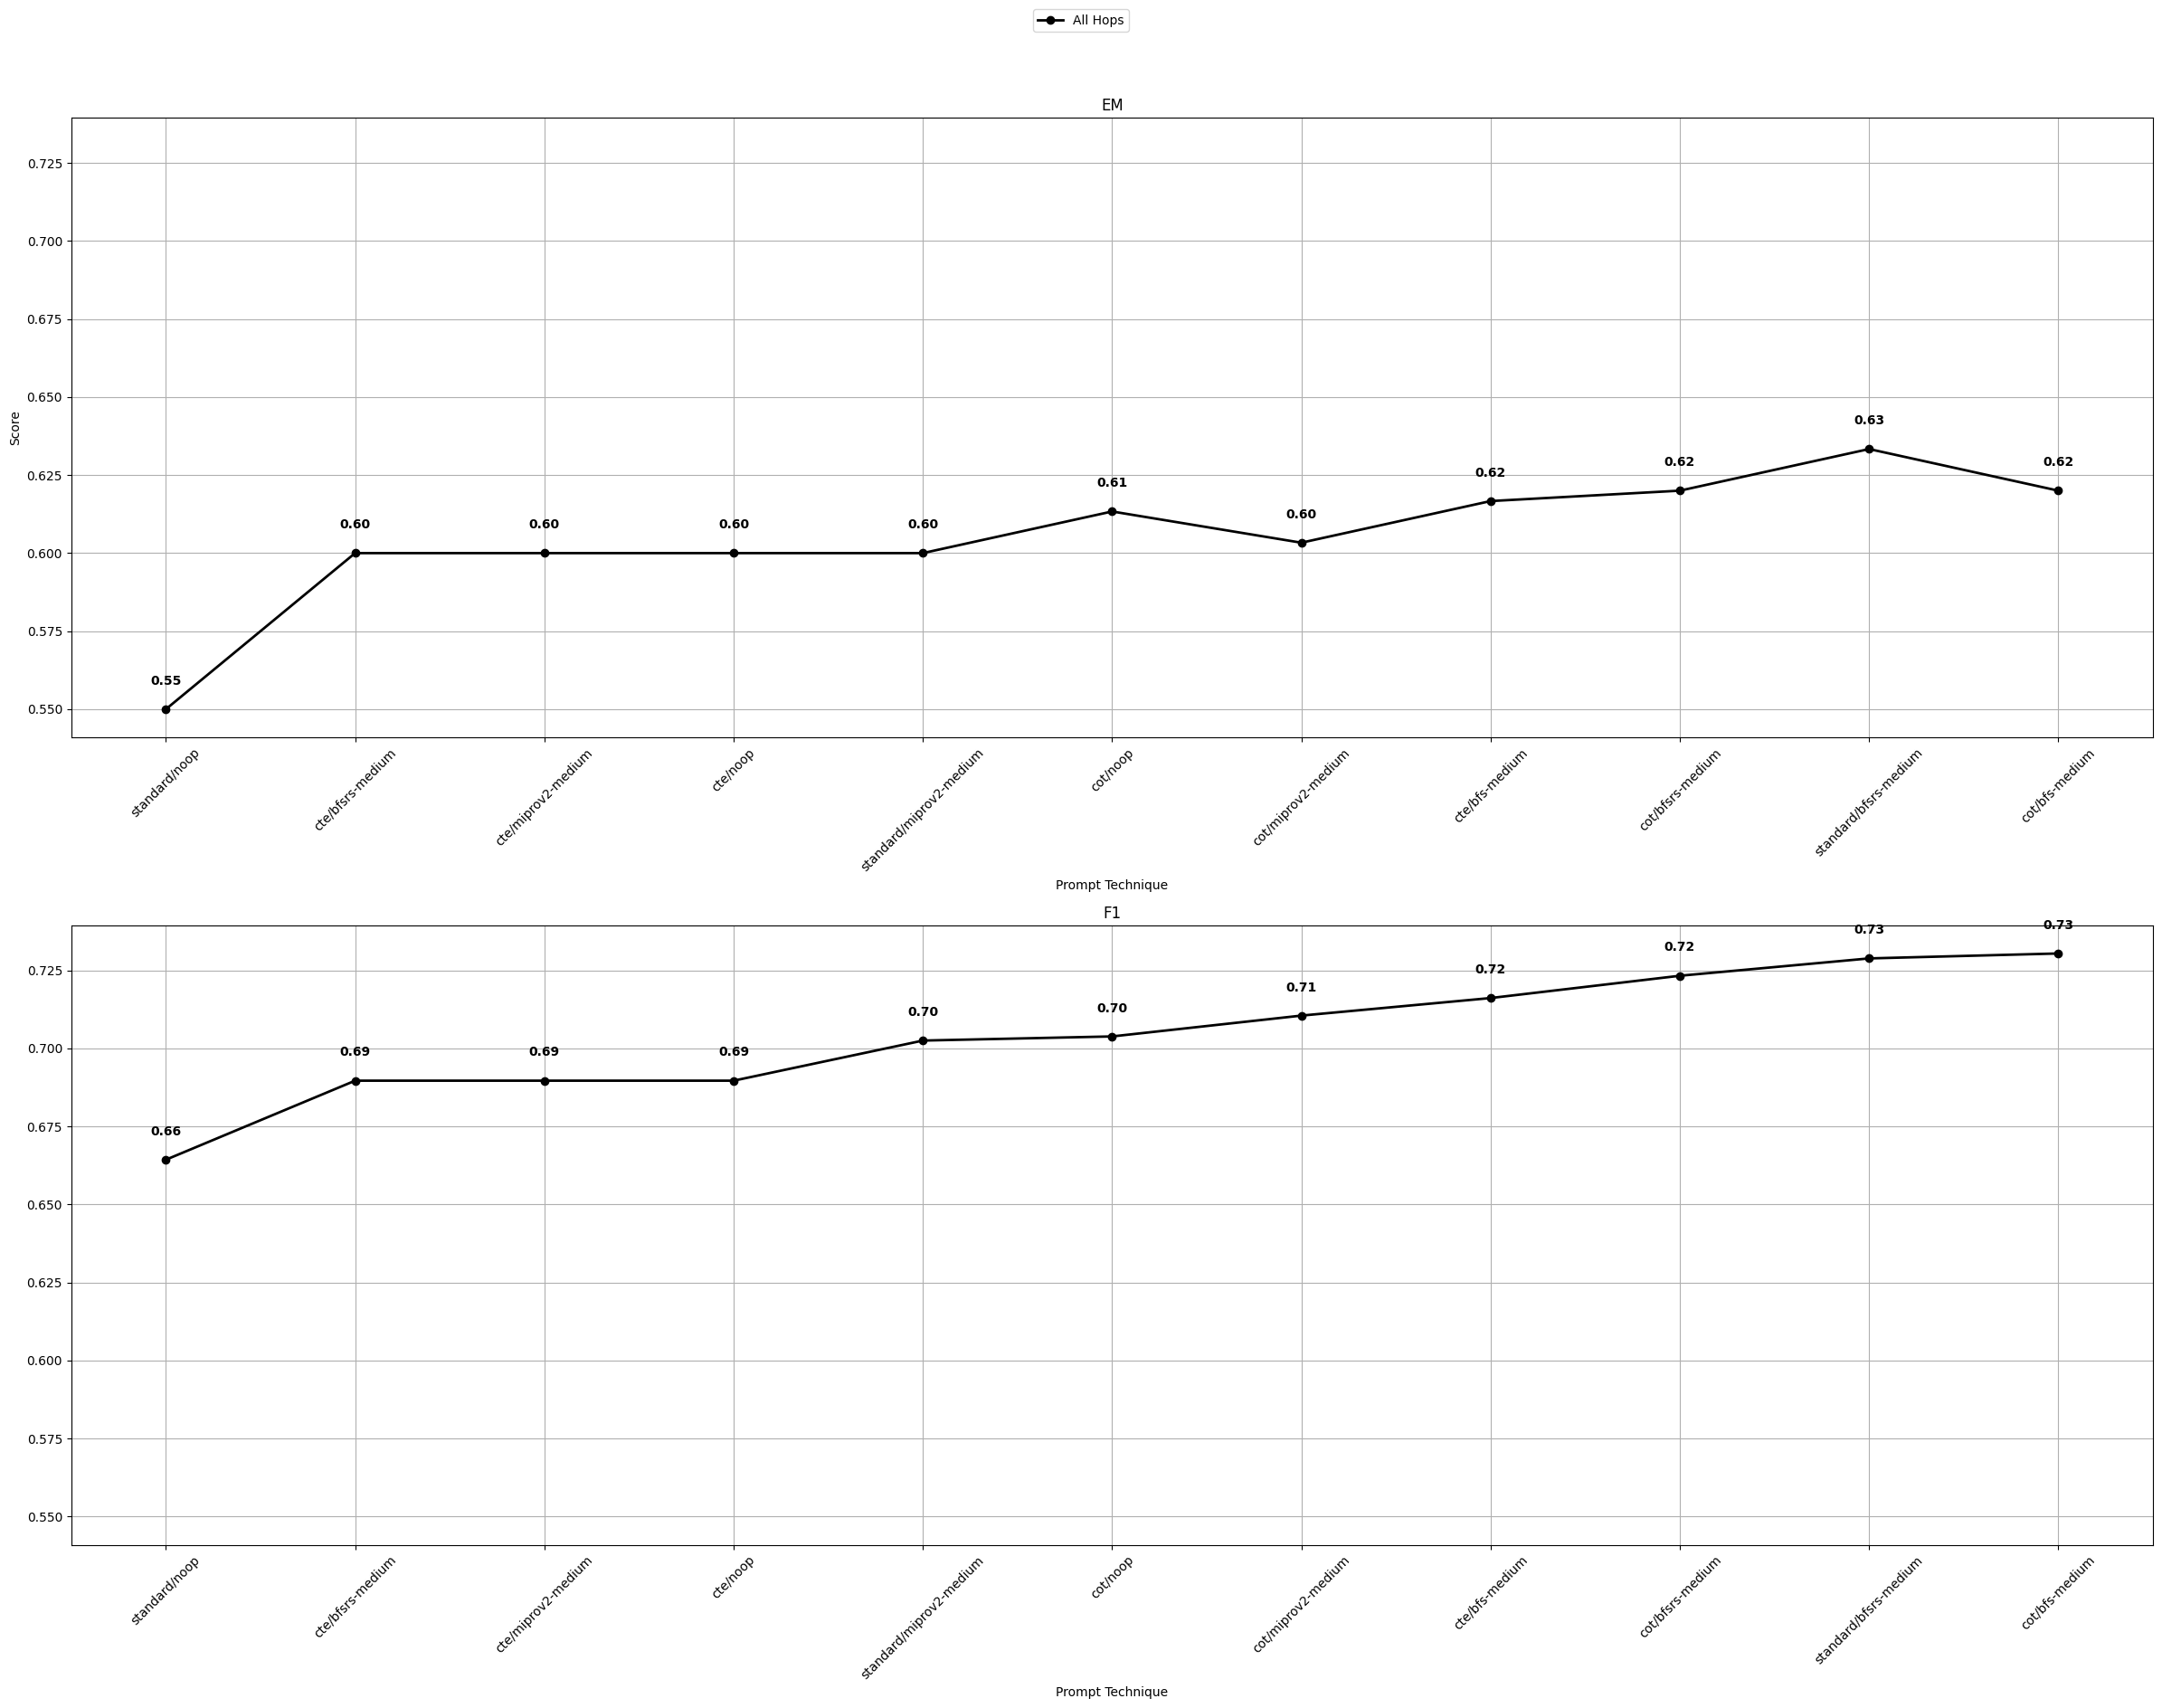

In [8]:
def plot_metric(ax, x, width, prompts, metrics, title, ylabel=None):
    # Plotting all hops as a line plot
    ax.plot(x, metrics["all"], label="All Hops", color="k", linestyle="-", marker="o", linewidth=2)

    # Adding values on top of the line plot
    for i, value in enumerate(metrics["all"]):
        ax.text(
            x[i],
            value + 0.007,
            f"{value:.2f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Adjust titles and labels
    ax.set_title(title)
    ax.set_xlabel("Prompt Technique")
    ax.set_xticks(x)
    ax.set_xticklabels([prompt.replace(".txt", "") for prompt in prompts], rotation=45)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.grid(True)


# Creating subplots for Exact Match and F1, separating them for clarity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 18), sharey=True)

width = 0.3  # Bar width adjustment

# Changing the order of prompts to standard, cot-zs, cot-fs, cte
prompts = [
    f"{pt}/{optim}"
    for pt, optim in zip(df_target["params.qa.technique"].values, df_target["params.train.optimizer"].values)
]
x = np.arange(len(prompts))

# Plotting Exact Match
metrics_em = {
    "all": df_target["metrics.exact_match"].values,
}
plot_metric(ax1, x, width, prompts, metrics_em, title="EM", ylabel="Score")

# Plotting F1
metrics_f1 = {
    "all": df_target["metrics.f1"].values,
}
plot_metric(ax2, x, width, prompts, metrics_f1, title="F1")

# Creating a shared legend outside the plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)

plt.tight_layout()
plt.show()